In [1]:
import os
import gc
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import sys
sys.path.append( '../util' )
import util as util

/var/folders/1s/tyt3m2l12dz6s028_blqch7r0000gn/T/ipykernel_86843/1971013312.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def create_multiclass_classification_model(input_shape, num_classes):
    inputs = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x) 
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [3]:
train, test = util.import_dataset(7,"dnn")
y_train = train[util.y_column]
y_test = test[util.y_column]

X_train = train.drop(util.y_column, axis=1)
X_test = test.drop(util.y_column, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

del train,test,y_train,y_test
num_classes = len(label_encoder.classes_)
print(" Number of classes is:" )
print(num_classes)
print("")
model = create_multiclass_classification_model(len(util.X_columns),num_classes)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#https://keras.io/api/models/model_training_apis/
history = model.fit(x=X_train, y=y_train_encoded,
                    validation_split=0.2, epochs=100, 
                    batch_size=256, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
del X_train,X_test,y_train_encoded,y_test_encoded

Importing datasets.....
Processing training and test data....
Finished processing training and test data
Mapping labels to seven classes.....
Data import and processing complete....
 Number of classes is:
8

Epoch 1/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 206s 2ms/step - accuracy: 0.9232 - loss: 0.1789 - val_accuracy: 0.9833 - val_loss: 0.0457
Epoch 2/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 209s 2ms/step - accuracy: 0.9593 - loss: 0.0949 - val_accuracy: 0.9896 - val_loss: 0.0290
Epoch 3/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 1154s 10ms/step - accuracy: 0.9675 - loss: 0.0755 - val_accuracy: 0.9897 - val_loss: 0.0272
Epoch 4/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 181s 2ms/step - accuracy: 0.9738 - loss: 0.0634 - val_accuracy: 0.9892 - val_loss: 0.0283
Epoch 5/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 135s 1ms/step - accuracy: 0.9739 - loss: 0.0608 - val_accuracy: 0.9902 - val_loss: 0.0262
Epoch 6/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 183s 2ms/step - accuracy: 0.9758 - loss: 0.0572 - val_accu

Test accuracy: 0.9913022518157959, Test loss: 0.023623324930667877


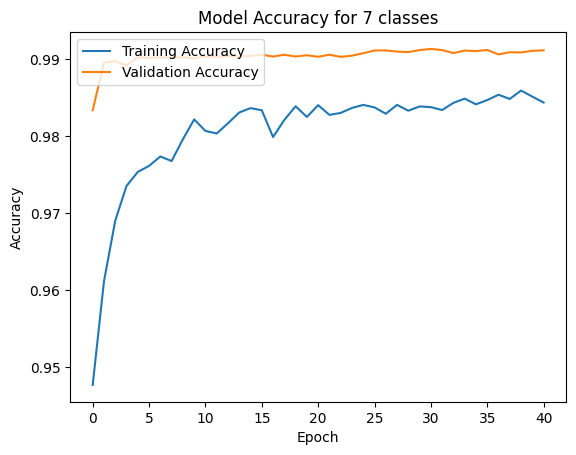

In [4]:
import matplotlib.pyplot as plt
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 7 classes')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [8]:
###Change this name so you don't overrwrite the one we have now
model.save('./dnn_model.keras')

In [10]:
from tensorflow.keras.models import load_model
loaded_model = load_model('./dnn_model.keras')
print(loaded_model.summary())
print(loaded_model.get_config())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 46)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         3,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,066 (90.11 KB)

 Trainable params: 7,688 (30.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,378 (60.07 KB)

None
{'name': 'functional_1', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 46), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 46]}, 'name': 'dense', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 46), 'dt

In [14]:
for layer in loaded_model.layers:
    weights = layer.get_weights()  
    #ValueError: not enough values to unpack (expected 2, got 0) <- fixing this error, not all llayers have bias or weight
    if len(weights) > 0:
        print(f"{layer.name} weights shape: {weights[0].shape}")
        if len(weights) > 1:
            print(f"{layer.name} biases shape: {weights[1].shape}")
    else:
        print(f"{layer.name} has no weights or biases.")

input_layer has no weights or biases.
dense weights shape: (46, 64)
dense biases shape: (64,)
dropout has no weights or biases.
dense_1 weights shape: (64, 64)
dense_1 biases shape: (64,)
dense_2 weights shape: (64, 8)
dense_2 biases shape: (8,)


In [22]:
from tensorflow.keras.utils import plot_model



In [23]:
plot_model(loaded_model, to_file='./modelpics/model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
